In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
car_sales = pd.read_csv('Car_sales.csv')

In [3]:
car_sales.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.8,Gas,no,1999,Golf IV


In [4]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [5]:
car_sales.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [6]:
car_sales.dropna(how='any',subset=['Price'],inplace = True)

In [7]:
car_sales.reset_index(inplace = True)

In [8]:
car_sales.isnull().sum()

index             0
Brand             0
Price             0
Body              0
Mileage           0
EngineV         148
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [9]:
continuous_var = car_sales.loc[:,(car_sales.dtypes == 'float64')|(car_sales.dtypes == 'int64')]

In [10]:
categorical_var = car_sales.loc[:,(car_sales.dtypes == 'object')]

In [11]:
continuous_var

,index,Price,Mileage,EngineV,Year
0,0,4200.0,277,2.0,1991
1,1,7900.0,427,2.9,1999
2,2,13300.0,358,5.0,2003
3,3,23000.0,240,4.2,2007
4,4,18300.0,120,2.0,2011
...,...,...,...,...,...
4168,4340,125000.0,9,3.0,2014
4169,4341,6500.0,1,3.5,1999
4170,4342,8000.0,194,2.0,1985
4171,4343,14200.0,31,NaN,2014


In [12]:
def continuous_car(x):
    return pd.Series([x.count(),x.isnull().sum(),x.mean(),x.median(),x.std(),x.min(),x.quantile(0.01),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75),x.quantile(0.90),x.quantile(0.95),x.quantile(0.99),x.max()], 
                     index =['N','NMISS','Mean','Median','STD','MIN','P1','P25','P50','P75','P90','P95','P99','Max'])

In [13]:
continuous_var.apply(continuous_car)

,index,Price,Mileage,EngineV,Year
N,4173.000000,4173.000000,4173.000000,4025.000000,4173.000000
NMISS,0.000000,0.000000,0.000000,148.000000,0.000000
Mean,2173.964534,19418.746935,164.088426,2.764586,2006.367362
Median,2173.000000,11500.000000,158.000000,2.200000,2007.000000
STD,1254.738370,25584.242620,104.823056,4.935941,6.686728
MIN,0.000000,600.000000,0.000000,0.600000,1969.000000
P1,43.720000,1585.280000,0.000000,1.200000,1987.000000
P25,1088.000000,6999.000000,90.000000,1.800000,2003.000000
P50,2173.000000,11500.000000,158.000000,2.200000,2007.000000
P75,3265.000000,21700.000000,230.000000,3.000000,2012.000000


In [14]:
continuous_var = continuous_var.apply(lambda x: x.clip(lower = x.quantile(0.01),upper = x.quantile(0.99)))

In [15]:
continuous_var.apply(continuous_car)

,index,Price,Mileage,EngineV,Year
N,4173.000000,4173.000000,4173.000000,4025.000000,4173.000000
NMISS,0.000000,0.000000,0.000000,148.000000,0.000000
Mean,2173.965972,18838.178550,163.023724,2.488351,2006.400671
Median,2173.000000,11500.000000,158.000000,2.200000,2007.000000
STD,1253.973876,21699.661957,100.492105,1.005951,6.571790
MIN,43.720000,1585.280000,0.000000,1.200000,1987.000000
P1,43.921600,1595.158400,0.000000,1.200000,1987.000000
P25,1088.000000,6999.000000,90.000000,1.800000,2003.000000
P50,2173.000000,11500.000000,158.000000,2.200000,2007.000000
P75,3265.000000,21700.000000,230.000000,3.000000,2012.000000


In [16]:
continuous_var.isnull().sum()

index        0
Price        0
Mileage      0
EngineV    148
Year         0
dtype: int64

In [17]:
continuous_EngineV_mean = continuous_var.EngineV.mean()

In [18]:
continuous_EngineV_mean

2.488350807453412

In [19]:
continuous_var.EngineV.fillna(continuous_EngineV_mean, inplace = True)

In [20]:
continuous_var.isnull().sum()

index      0
Price      0
Mileage    0
EngineV    0
Year       0
dtype: int64

In [21]:
categorical_var.isnull().sum()

Brand           0
Body            0
Engine Type     0
Registration    0
Model           0
dtype: int64

In [22]:
categorical_var.Brand.value_counts()

Volkswagen       908
Mercedes-Benz    852
BMW              669
Toyota           523
Renault          456
Audi             442
Mitsubishi       323
Name: Brand, dtype: int64

In [23]:
categorical_var.Body.value_counts()

sedan        1604
crossover     840
van           642
other         418
vagon         390
hatch         279
Name: Body, dtype: int64

In [24]:
categorical_var['Engine Type'].value_counts()

Diesel    1903
Petrol    1514
Gas        606
Other      150
Name: Engine Type, dtype: int64

In [25]:
categorical_var.Registration.value_counts()

yes    3779
no      394
Name: Registration, dtype: int64

In [26]:
categorical_var.Model.value_counts()

E-Class         193
A6              168
Vito            164
Kangoo          142
Camry           131
               ... 
SLK 350           1
250               1
CLK 430           1
Sprinter 315      1
CLK 220           1
Name: Model, Length: 310, dtype: int64

In [27]:
categorical_var.drop(columns = 'Model', inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
categorical_var

,Brand,Body,Engine Type,Registration
0,BMW,sedan,Petrol,yes
1,Mercedes-Benz,van,Diesel,yes
2,Mercedes-Benz,sedan,Gas,yes
3,Audi,crossover,Petrol,yes
4,Toyota,crossover,Petrol,yes
...,...,...,...,...
4168,Mercedes-Benz,sedan,Diesel,yes
4169,BMW,sedan,Petrol,yes
4170,BMW,sedan,Petrol,yes
4171,Toyota,sedan,Petrol,yes


In [29]:
categorical_var.rename( columns = {'Engine Type': 'Engine_Type'}, inplace=True )

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [30]:
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [31]:
cars_cat_vars = categorical_var[['Brand', 'Body', 'Engine_Type', 'Registration']]

for c_feature in cars_cat_vars.columns:
    
    cars_cat_vars.loc[:,c_feature] = cars_cat_vars[c_feature].astype('category')
    
    cars_cat_vars = create_dummies(cars_cat_vars, c_feature)

In [32]:
cars_cat_vars

,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine_Type_Gas,Engine_Type_Other,Engine_Type_Petrol,Registration_yes
0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4168,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4169,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
4170,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
4171,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1


In [33]:
car_sales_new = pd.concat([continuous_var,cars_cat_vars], axis = 1)

In [34]:
car_sales_new.shape,continuous_var.shape

((4173, 20), (4173, 5))

In [35]:
car_sales_new

,index,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine_Type_Gas,Engine_Type_Other,Engine_Type_Petrol,Registration_yes
0,43.72,4200.0,277,2.000000,1991,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,43.72,7900.0,427,2.900000,1999,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,43.72,13300.0,358,5.000000,2003,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,43.72,23000.0,240,4.200000,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,43.72,18300.0,120,2.000000,2011,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4168,4301.28,125000.0,9,3.000000,2014,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4169,4301.28,6500.0,1,3.500000,1999,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
4170,4301.28,8000.0,194,2.000000,1987,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
4171,4301.28,14200.0,31,2.488351,2014,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

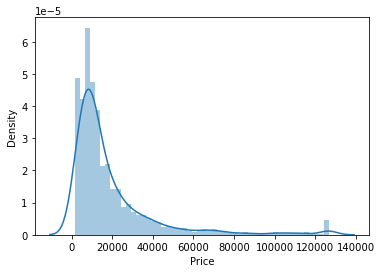

In [36]:
sns.distplot(car_sales_new.Price)

In [37]:
corrm = car_sales_new.corr()

In [38]:
corrm

,index,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine_Type_Gas,Engine_Type_Other,Engine_Type_Petrol,Registration_yes
index,1.000000,0.041841,-0.022206,0.013079,0.018539,0.023989,0.031072,-0.024363,-0.010550,0.006675,-0.012292,-0.013260,-0.004532,0.014075,-0.005874,-0.008154,-0.024815,-0.007678,0.024676,0.015538
Price,0.041841,1.000000,-0.534994,0.419485,0.549118,0.093481,0.213909,-0.100625,-0.174281,0.059458,-0.138786,-0.107905,0.028085,-0.130891,-0.131155,-0.125255,-0.125765,-0.020649,0.046269,0.217318
Mileage,-0.022206,-0.534994,1.000000,-0.027844,-0.694190,0.053426,0.083013,-0.065325,-0.021884,-0.171481,0.020609,-0.077136,-0.009532,0.112414,0.099647,0.123289,0.120373,-0.022555,-0.201626,-0.233637
EngineV,0.013079,0.419485,-0.027844,1.000000,0.026841,0.150891,0.259958,-0.067786,-0.261732,0.097040,-0.251761,-0.222666,0.038089,0.020697,-0.140252,-0.186175,0.076583,-0.012387,0.086255,0.025441
Year,0.018539,0.549118,-0.694190,0.026841,1.000000,-0.092146,-0.032694,-0.003469,0.097523,0.113941,0.015926,-0.042164,0.013061,-0.217987,-0.056789,0.065879,-0.179466,0.007817,-0.006190,0.247300
Brand_BMW,0.023989,0.093481,0.053426,0.150891,-0.092146,1.000000,-0.221318,-0.126562,-0.153044,-0.165400,-0.230426,-0.088196,-0.017431,0.167636,-0.046052,-0.186316,-0.044773,-0.014201,0.107696,-0.102381
Brand_Mercedes-Benz,0.031072,0.213909,0.083013,0.259958,-0.032694,-0.221318,1.000000,-0.146709,-0.177407,-0.191730,-0.267108,-0.080836,0.096349,0.043399,-0.121781,0.064133,-0.043410,0.001196,-0.054543,0.025297
Brand_Mitsubishi,-0.024363,-0.100625,-0.065325,-0.067786,-0.003469,-0.126562,-0.146709,1.000000,-0.101451,-0.109642,-0.152747,-0.009317,-0.018979,0.007091,-0.068354,-0.106108,0.168226,0.001877,0.057468,0.059791
Brand_Renault,-0.010550,-0.174281,-0.021884,-0.261732,0.097523,-0.153044,-0.177407,-0.101451,1.000000,-0.132584,-0.184709,0.032328,-0.029874,-0.185179,0.172538,0.267913,-0.092045,0.010765,-0.152469,0.042171
Brand_Toyota,0.006675,0.059458,-0.171481,0.097040,0.113941,-0.165400,-0.191730,-0.109642,-0.132584,1.000000,-0.199621,0.063845,-0.037096,-0.004506,-0.091701,-0.145359,0.174719,-0.003108,0.107256,0.112325


<AxesSubplot:>

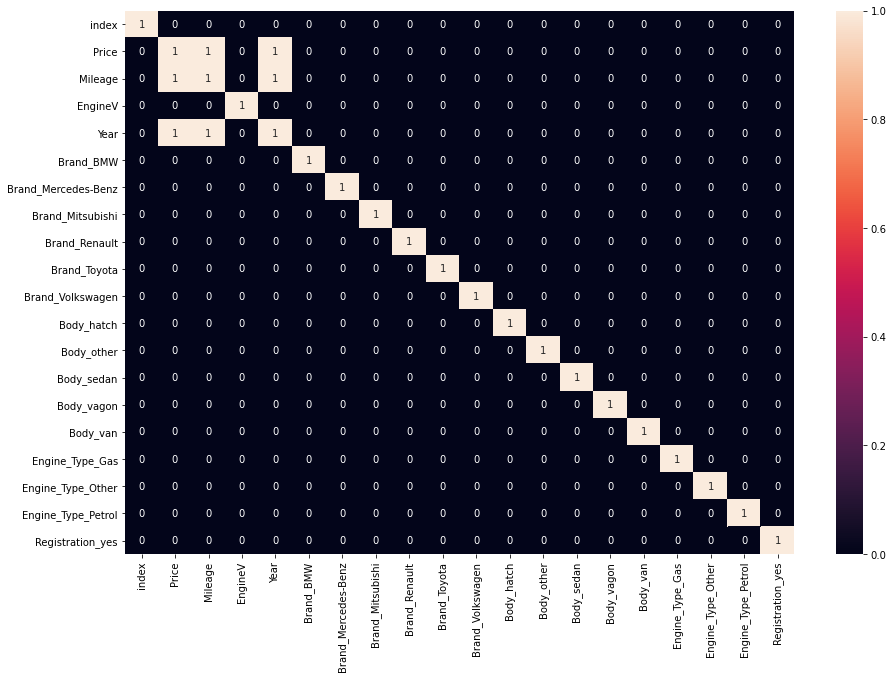

In [39]:
plt.figure(figsize = (15,10))
sns.heatmap(abs(corrm)>0.5,annot = True)

In [40]:
car_sales_new.rename( columns = {'Brand_Mercedes-Benz': 'Brand_Mercedes_Benz'}, inplace=True )

In [41]:
feature_columns = car_sales_new.columns.difference(['Price'])

In [42]:
feature_columns

Index(['Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Brand_BMW', 'Brand_Mercedes_Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'EngineV', 'Engine_Type_Gas',
       'Engine_Type_Other', 'Engine_Type_Petrol', 'Mileage',
       'Registration_yes', 'Year', 'index'],
      dtype='object')

In [43]:
from sklearn.feature_selection import f_regression

In [44]:
features_X = car_sales_new[feature_columns]
target_Y = car_sales_new.Price

F_values,p_values = f_regression(features_X,target_Y)


f_regression_data = pd.DataFrame([feature_columns,F_values.round(2),p_values.round(2)]).T

f_regression_data.columns = ['Features','F_values','p_values']

In [45]:
f_regression_data

,Features,F_values,p_values
0,Body_hatch,49.14,0.0
1,Body_other,3.29,0.07
2,Body_sedan,72.7,0.0
3,Body_vagon,73.0,0.0
4,Body_van,66.48,0.0
5,Brand_BMW,36.77,0.0
6,Brand_Mercedes_Benz,200.0,0.0
7,Brand_Mitsubishi,42.66,0.0
8,Brand_Renault,130.66,0.0
9,Brand_Toyota,14.8,0.0


In [46]:
feature_columns = list(f_regression_data.loc[f_regression_data.p_values <= 0.05, 'Features'])

In [47]:
feature_columns

['Body_hatch',
 'Body_sedan',
 'Body_vagon',
 'Body_van',
 'Brand_BMW',
 'Brand_Mercedes_Benz',
 'Brand_Mitsubishi',
 'Brand_Renault',
 'Brand_Toyota',
 'Brand_Volkswagen',
 'EngineV',
 'Engine_Type_Gas',
 'Engine_Type_Petrol',
 'Mileage',
 'Registration_yes',
 'Year',
 'index']

In [48]:
model_parameters = 'Price ~ ' + ' + '.join(feature_columns)

In [49]:
model_parameters

'Price ~ Body_hatch + Body_sedan + Body_vagon + Body_van + Brand_BMW + Brand_Mercedes_Benz + Brand_Mitsubishi + Brand_Renault + Brand_Toyota + Brand_Volkswagen + EngineV + Engine_Type_Gas + Engine_Type_Petrol + Mileage + Registration_yes + Year + index'

In [50]:
model_parameters = '''Price ~ Body_hatch + Body_sedan + Body_vagon + Body_van + Brand_BMW + Brand_Mercedes_Benz + 
                      Brand_Mitsubishi + Brand_Renault + Brand_Toyota + Brand_Volkswagen + EngineV + Engine_Type_Gas + 
                      Engine_Type_Petrol + Mileage + Registration_yes'''

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [52]:
y,X = dmatrices(model_parameters,car_sales_new, return_type = 'dataframe')

In [53]:
vif = pd.DataFrame()

vif['Features'] = X.columns
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in  range(X.shape[1])]

vif.round(1)

,Features,VIF Factor
0,Intercept,39.5
1,Body_hatch,1.3
2,Body_sedan,1.7
3,Body_vagon,1.5
4,Body_van,1.8
5,Brand_BMW,2.2
6,Brand_Mercedes_Benz,2.5
7,Brand_Mitsubishi,1.8
8,Brand_Renault,2.1
9,Brand_Toyota,2.1


In [54]:
VIF = vif.drop(vif.index[0]).round(2)

In [55]:
VIF = list(set(VIF.loc[:,'Features']))

In [56]:
VIF

['Body_hatch',
 'Body_vagon',
 'EngineV',
 'Mileage',
 'Brand_Toyota',
 'Engine_Type_Gas',
 'Brand_Mercedes_Benz',
 'Body_van',
 'Body_sedan',
 'Brand_BMW',
 'Engine_Type_Petrol',
 'Brand_Mitsubishi',
 'Registration_yes',
 'Brand_Volkswagen',
 'Brand_Renault']

In [57]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [58]:
X_train, X_test, y_train, y_test = train_test_split(car_sales_new[VIF], car_sales_new['Price'], test_size=0.3, random_state = 7)

In [59]:
model = sm.OLS(y_train,X_train.drop(columns = ['Brand_Toyota','Body_vagon','Brand_Volkswagen']))

In [60]:
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.730
Model:                            OLS   Adj. R-squared (uncentered):              0.729
Method:                 Least Squares   F-statistic:                              656.7
Date:                Fri, 05 Nov 2021   Prob (F-statistic):                        0.00
Time:                        04:41:37   Log-Likelihood:                         -32259.
No. Observations:                2921   AIC:                                  6.454e+04
Df Residuals:                    2909   BIC:                                  6.461e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [61]:
y_hat_predict = result.predict(X_test.drop(columns = ['Brand_Toyota','Body_vagon','Brand_Volkswagen']))

In [62]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [63]:
r2_score(y_test,y_hat_predict)

0.49670353904917997

In [64]:
np.sqrt(mean_squared_error(y_test,y_hat_predict))

14697.947487133806

In [65]:
mean_absolute_error(y_test,y_hat_predict)

9643.085596367875

In [66]:
np.std(y_test)**2

429229444.4638516

In [67]:
mean_squared_error(y_test,y_hat_predict)

216029660.33454296

In [68]:
np.std(y_test)**2 - mean_squared_error(y_test,y_hat_predict)

213199784.1293086

In [69]:
model = sm.OLS(car_sales_new['Price'],car_sales_new[VIF].drop(columns = ['Brand_Toyota','Body_vagon','Brand_Volkswagen']))

In [70]:
result = model.fit()

In [71]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.728
Model:                            OLS   Adj. R-squared (uncentered):              0.727
Method:                 Least Squares   F-statistic:                              927.1
Date:                Fri, 05 Nov 2021   Prob (F-statistic):                        0.00
Time:                        04:41:37   Log-Likelihood:                         -46046.
No. Observations:                4173   AIC:                                  9.212e+04
Df Residuals:                    4161   BIC:                                  9.219e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [72]:
reg = LinearRegression()

In [73]:
model = reg.fit(X_train,y_train)

In [74]:
y_pred = reg.predict(X_test)

In [75]:
y_pred

array([  9590.78400626,  24704.70814978,  30047.92543326, ...,
        29059.77228974, -26782.70113421,   8129.15960549])

In [76]:
r2_score(y_test,y_pred)

0.5377367773866242

Text(0.5, 1.0, 'Actual vs Prediction')

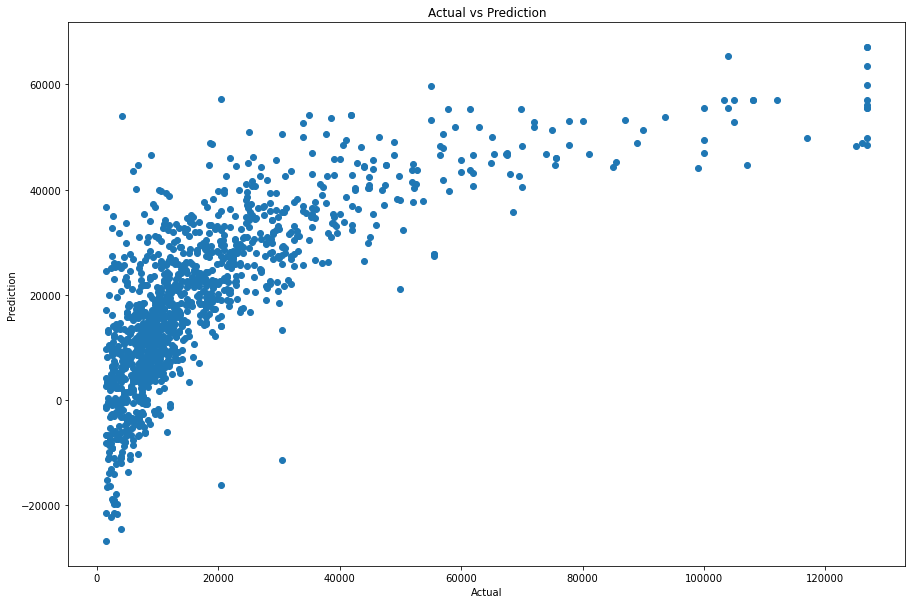

In [77]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs Prediction')

In [78]:
predict_yy = pd.DataFrame({'Actual_Price': y_test,'Predicted_Price':y_pred,'Difference':y_test - y_pred})

In [79]:
predict_yy

,Actual_Price,Predicted_Price,Difference
1096,3500.00,9590.784006,-6090.784006
3812,14500.00,24704.708150,-10204.708150
892,8200.00,30047.925433,-21847.925433
1953,13300.00,23889.122869,-10589.122869
651,20500.00,29494.791424,-8994.791424
...,...,...,...
1391,77777.00,53047.869262,24729.130738
2930,10200.00,18819.851235,-8619.851235
2265,13900.00,29059.772290,-15159.772290
1527,1585.28,-26782.701134,28367.981134
